## Image Retrieval with Text query

* [How Google (probably) implemented image search](https://www.quora.com/How-does-a-Google-image-search-engine-work/answer/John-Koala)
 * pattern matching to image metadata
 * content-based search for new images to identify tags
 * DL augmentations: add tags of recognised objects to an image, e.g. "dog", "cat", "sky"

## Literature Overview

* [Recent Advance in Content-based Image Retrieval: A Literature Survey](https://arxiv.org/pdf/1706.06064.pdf)
 * TODO: classic inverted file structure to index large scale visual database for scalable retrieval
* [Deep Image Retrieval: Learning global representations for image search](https://arxiv.org/pdf/1604.01325v2.pdf) - discovering concise fixed-lenght global image descriptor for CBIR

## Potentially Relevant Papers

* [A Case for Query by Image and Text Content: Searching Computer Help using Screenshots and Keywords](http://ramb.ethz.ch/CDstore/www2011/proceedings/p775.pdf) - investigate how to perform CBIR with a supporting text query
 * might not be very relevant since it seems to do it separately, i.e. first filter everything by keyword, and then filter results by image
* [Web Image Re-Ranking Using Query-Specific Semantic Signatures](http://www.ee.cuhk.edu.hk/~xgwang/papers/wangQLTpami13.pdf) - proposes improvements to re-ranking images in a two-stage search: I) query images by keywords II) CBIS with visual feedback from user (i.e. google search -> show similar pictures)
* [CBIR using Speech, Text & Image Query for Mobile Device](https://pdfs.semanticscholar.org/d176/435aedc195539765afe3e42da920758bdd34.pdf) - has wide literature overview for image search with text queries

## Suggested Papers

### [A New Benchmark and Approach for Fine-grained Cross-media Retrieval](https://arxiv.org/pdf/1907.04476.pdf)
> Therefore,
in this paper, we first construct a new benchmark for fine-grained
cross-media retrieval, which consists of 200 fine-grained subcategories of the “Bird”, and contains 4 media types, including image,
text, video and audio.

> we propose a uniform deep model, namely FGCrossNet, which simultaneously learns 4 types of media without discriminative treatments

While current reasearch has some progress in coarse-grained multimodal medai retrieval, this paper want to discover fine-coarced retrieval. That is, when you query with an image of "Herring Gull", they want to give you multimedai results with that particular species instead of anything related to a class "BIRD"

> Fine-grained cross-media retrieval has three challenges: (1) Few datasets ... (2) Heterogeneity gap - Variant types of media have inconsistent distributions and feature representations ... (3) Small inter-class variance ...

> , Peng et al. construct the PKU
XMediaNet [1], which is the largest cross-media dataset with up to
5 media types, including image, text, video, audio and 3D model. It
contains 100,000 samples from 200 coarse-grained categories. Its
categories are selected from WordNet 1
, and cover 47 species of
animals such as “Bird” and “Dog”, as well as 153 types of artifacts,
such as “Airplane” and “Car”

> Existing cross-media retrieval methods generally deal with different
media data through different network streams, which causes some
issues: (1) Architecture complexity - Different media data maybe
processed by different types of networks... (thus when you merge all of them, it gets really complicated) (2) Training difficulty -
Since the network architecture is complex, its training certainly
will be difficult, which causes it hard to reproduce the method... we propose a uniform deep model, which adopts the
same architecture to simultaneously learn 4 media data without
discriminative treatments

>  Data Preprocessing ... For image, there is no
need to do any preprocessing. For video, we draw 25 uniformlyspaced frames of each video as the video data. For audio, we apply
Short-Time Fourier Transformation [16] to generate spectrogram
for each audio instance... {for description, i.e. text input, they do one-hot encoding of each character, producing 448x16 vector. Then apply a few convolutions and get uniformed format for all types of data input, i.e. 448x448x3 tensor)

> loss function ...{consists of}... classification constraint ensures the learning of discriminative features for fine-grained subcategories, center constraint ensures the compactness characteristic of the features of
the same subcategory, and ranking constraint ensures the sparsity
characteristic of the features of different subcategories.

*classification constraint* is just a sum of cross-entropy loss functions(i.e. loss between FC vector & label for that item) summed through all test samples and all types of input

*center constraint* - suppose to minimize the intra-class variance. It's a squared sum of difference between i-th item features (FC vector, which is the result of NN) and respective label center(gets updated after each batch is processed and reassigned to different classes). The same approach for any media type

*ranking constraint* - suppose to maximize the inter-class variance. It's a quadruplet loss function, which is basically a sum of squread differences between 4 data points. Also, those data points have following restrictions: 1) each of them is from different media type 2) they represent 3 different classes, i.e. 2 items are from the same class. Then the error = sum of distances is designed in a way to apply penalty for small intercluster distances as well as for big inner-cluster difference

Training is done in a following way:
* just as in ranking constraint, they take 4 instances of 4 different types but only from 3 categories at a time
* firstly they fine-tune the NN trained on ImageNet only with their images, and only then start training with 4-items batches of different types

**TODO: research those methods9start with SCAN and GXN, which specifically designed to image-text learning)**
> We compare our FGCrossNet with state-of-the-art cross-media retrieval methods, including MHTN [20], ACMR [21], JRL [22], GSPH
[23], CMDN [24], SCAN [25], GXN [26]. MHTN [20]

They state that only with classification constraint "achieves better retrieval performance than all the compared methods". If you also add central constraint to it, we would have better retrieval performance by 0.0043. And if you add also ranking constraint, "achieves the best performance except on “I → A” and “A → I”." (not sure that I got the last part

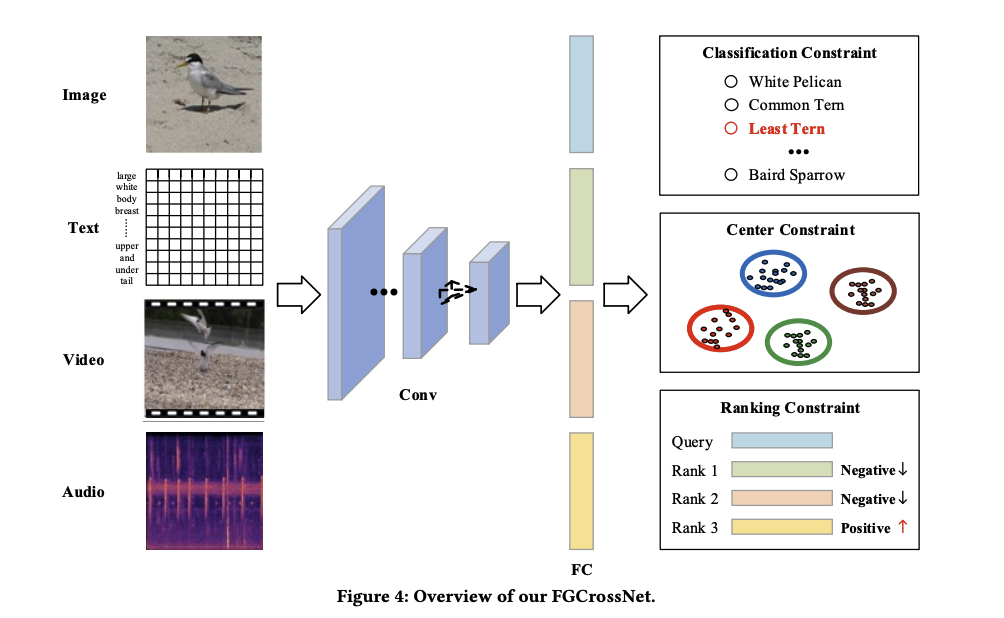 

## [Deep Cross-Modal Hashing](http://openaccess.thecvf.com/content_cvpr_2017/papers/Jiang_Deep_Cross-Modal_Hashing_CVPR_2017_paper.pdf)
> In this paper, we propose a novel CMH
method, called deep cross-modal hashing (DCMH), by
integrating feature learning and hash-code learning into
the same framework. ... During learning, each part can give feedback
to the other part.

> ... DCMH can outperform other baselines to achieve
the state-of-the-art performance in cross-modal retrieval
applications.

> The goal of hashing is to map the
data points from the original space into a Hamming space
of binary codes where the similarity in the original space
is preserved in the Hamming space. By using binary hash
codes to represent the original data, the storage cost can
be dramatically reduced. Furthermore, we can achieve a
constant or sub-linear time complexity for search by using
hash codes to construct an index

> Existing MMH methods can be divided into two main
categories: mutli-source hashing (MSH)
and cross-modal hashing (CMH). The
goal of MSH is to learn hash codes by utilizing all the information from multiple modalities ... the application scenarios of CMH are more
flexible than those of MSH. In CMH, the modality of a
query point is different from the modality of the points in
database. Furthermore, typically the query point has only
one modality and the points in the database can have one or
more modalities. For example, we can use text queries to
retrieve images in the database, and we can also use image
queries to retrieve texts in the database.

> Almost all these existing CMH
methods are based on hand-crafted features. One
shortcoming of these hand-crafted feature based methods
is that the feature extraction procedure is independent of
the hash-code learning procedure, which means that the
hand-crafted features might not be optimally compatible with the hash-code learning procedure. 

> The main contributions of DCMH are
outlined as follows:
* DCMH is an end-to-end learning framework with deep
neural networks, one for each modality, to perform
feature learning from scratch.
* The hash-code learning problem is essentially a discrete learning problem, which is difficult to learn.
Hence, most existing CMH methods solve this problem by relaxing the original discrete learning problem
into a continuous learning problem. This relaxation
procedure may deteriorate the accuracy of the learned
hash codes [25]. Unlike these relaxation-based methods, DCMH directly learns the discrete hash codes
without relaxation.
* Experiments on real datasets with image-text modalities show that DCMH can outperform other baselines
to achieve the state-of-the-art performance in crossmodal retrieval applications.

So the task is, having:
* a collection of training data points, consisting of pairs X and Y, which are image and text feature respectively
* cross-modal similarity matrix S, where $S_{ij}$ = 1 if image $x_i$ and text $y_j$ are similar, and $S_{ij}$ = 0 otherwise.

We need to learn two has functions $h_x(x) \in \{-1, +1\}^c$ and $h_y(y) \in \{-1, +1\}^c$, where c is the length of binary code. These two
hash functions should preserve the cross-modal similarity
in S. More specifically, if $S_{ij} = 1$, the Hamming distance
between the binary codes should be small. Otherwise, if $S_{ij} = 0$, the corresponding Hamming distance should be large.

> The feature learning part contains two deep neural networks, one for image modality and the other for text modality... The deep neural network for image modality is a convolutional neural network...To perform feature learning from text, we first represent
each text $y_j$ as a vector with bag-of-words (BOW) representation. And then the bag-of-words vectors are used as
the input to a deep neural network with two fully-connected
layers, denoted as “full1 - full2”

So, the objective function of DCMH model is defined as minimisation of Functions J, which consists of a sum of:
* the negative log likelihood of the cross-modal similarities, which make the similarity(inner product) beween image and text learned feature be high, when $S_{ij} = 1$, and small when $S_{ij} = 0$
* norm of differences between learned features and corresponding hash codes, which forces HASH_CODE = sign(FEATURE), effectively making FEATURE a continious surrogate of HASH_CODE (needed to easier? learning on continious data)
* sum of all bits in a HASH_CODE, which will force them to have almost equal amount of -1 and 1 to maximize the information provided by each bit.

Also, during training they made hash code for all text & image the within the pair to get better performance (heuristic).

They also perform learning by iteratively fixing 2 of $\theta_x, \theta_x,$ HASH_FUNC unknowns, and optimising for the remaining one

Entire algorithm in a nutshell:
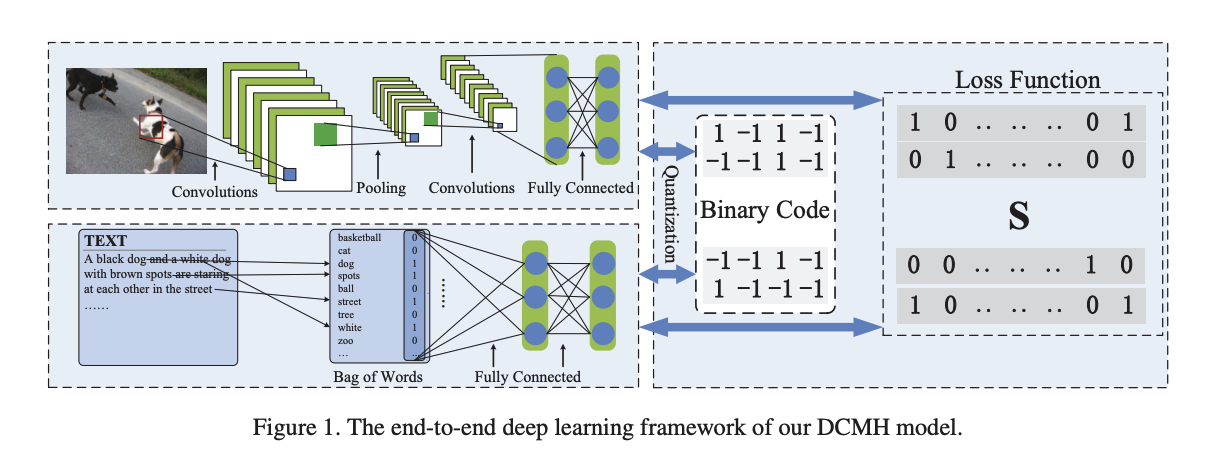